In [94]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [59]:
#Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it
df=pd.read_csv("C:/Users/ASHWIN/OneDrive/Documents/GitHub/randomwalk-ds-assessment-level2/dataset.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [7]:
# Check missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


In [9]:
# Check for incorrect/outlier values in body_mass_g
print("\nPotential incorrect values in body_mass_g:")
print(df[df['body_mass_g'] > 10000])


Potential incorrect values in body_mass_g:
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
73   Adelie  Torgersen            45.8           18.9              197.0   
206  Gentoo     Biscoe            46.5           14.4              217.0   

     body_mass_g     sex  
73       15000.0    male  
206      12000.0  female  


In [31]:
# 1. Data cleaning steps:
# 1. Handle missing values 
df = df.copy()  
df = df.assign(sex=df['sex'].fillna("unknown"))  # Fill missing sex values
df = df.dropna()  # Remove rows with any remaining missing values

In [33]:
# 2. Fix incorrect body mass values
# Replace extremely high values (>10000) with median of respective species
species_median = df.groupby('species')['body_mass_g'].median()
df.loc[df['body_mass_g'] > 10000, 'body_mass_g'] = df.loc[df['body_mass_g'] > 10000, 'species'].map(species_median)

In [35]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nDataset shape after cleaning:", df.shape)


Missing values after cleaning:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Dataset shape after cleaning: (337, 7)


In [ ]:
#Explanation of data cleaning steps:

#Missing values were found in several columns, particularly in bill_length_mm, bill_depth_mm, and sex
#Some incorrect values were identified in body_mass_g (values > 10000g which is unrealistic for these penguin species)
#Cleaning steps performed:

#Filled missing sex values with 'unknown'
#Removed rows with missing numerical measurements
#Corrected extreme body mass values by replacing them with species median


#The cleaned dataset is now ready for analysis

In [61]:
# Q2: What is the average body_mass_g for Gentoo penguins?
gentoo_mass = df[df['species'] == 'Gentoo']['body_mass_g'].mean()
print(f"Average body mass of Gentoo penguins: {gentoo_mass:.2f} g")

Average body mass of Gentoo penguins: 5133.74 g



Adelie Statistics:
Bill Length - Skewness: 0.160, Kurtosis: -0.192
Bill Depth - Skewness: 0.318, Kurtosis: -0.098

Gentoo Statistics:
Bill Length - Skewness: 0.676, Kurtosis: 1.230
Bill Depth - Skewness: 0.342, Kurtosis: -0.561

Chinstrap Statistics:
Bill Length - Skewness: -0.118, Kurtosis: -0.039
Bill Depth - Skewness: -0.002, Kurtosis: -0.927


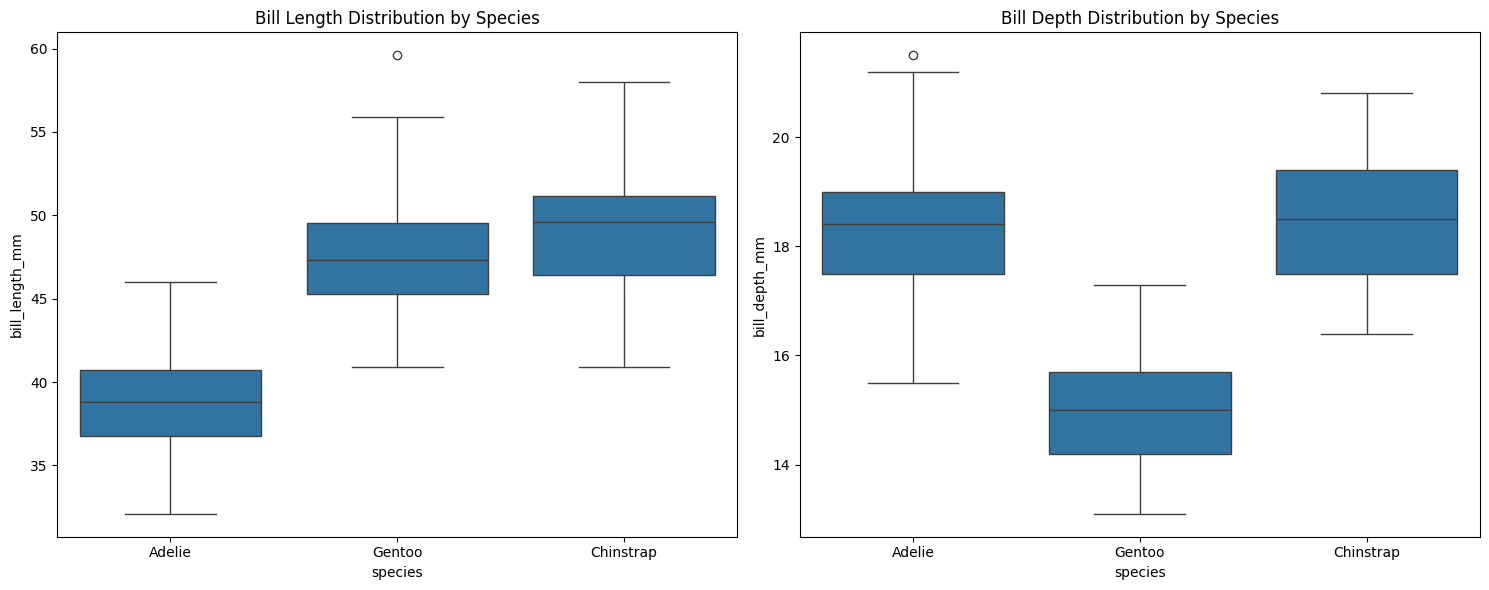

In [57]:
# Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species.
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    
    # Bill length statistics
    length_skew = stats.skew(species_data['bill_length_mm'])
    length_kurt = stats.kurtosis(species_data['bill_length_mm'])
    
    # Bill depth statistics
    depth_skew = stats.skew(species_data['bill_depth_mm'])
    depth_kurt = stats.kurtosis(species_data['bill_depth_mm'])
    
    print(f"\n{species} Statistics:")
    print(f"Bill Length - Skewness: {length_skew:.3f}, Kurtosis: {length_kurt:.3f}")
    print(f"Bill Depth - Skewness: {depth_skew:.3f}, Kurtosis: {depth_kurt:.3f}")

# Create distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bill length distribution
sns.boxplot(x='species', y='bill_length_mm', data=df, ax=ax1)
ax1.set_title('Bill Length Distribution by Species')

# Bill depth distribution
sns.boxplot(x='species', y='bill_depth_mm', data=df, ax=ax2)
ax2.set_title('Bill Depth Distribution by Species')

plt.tight_layout()
plt.show()

In [ ]:
#Explanation for Q3

#We calculated skewness (measure of asymmetry) and kurtosis (measure of "tailedness") for each species
#Skewness > 0 indicates right skew, < 0 indicates left skew
#Kurtosis > 0 indicates heavier tails than normal distribution
#The boxplots visualize the distribution differences between species
#Gentoo penguins generally have longer bills but smaller bill depth
#Chinstrap and Adelie penguins have more similar bill measurements


In [55]:
# Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers.
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Function to detect outliers using IQR method
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return len(outliers), lower_bound, upper_bound

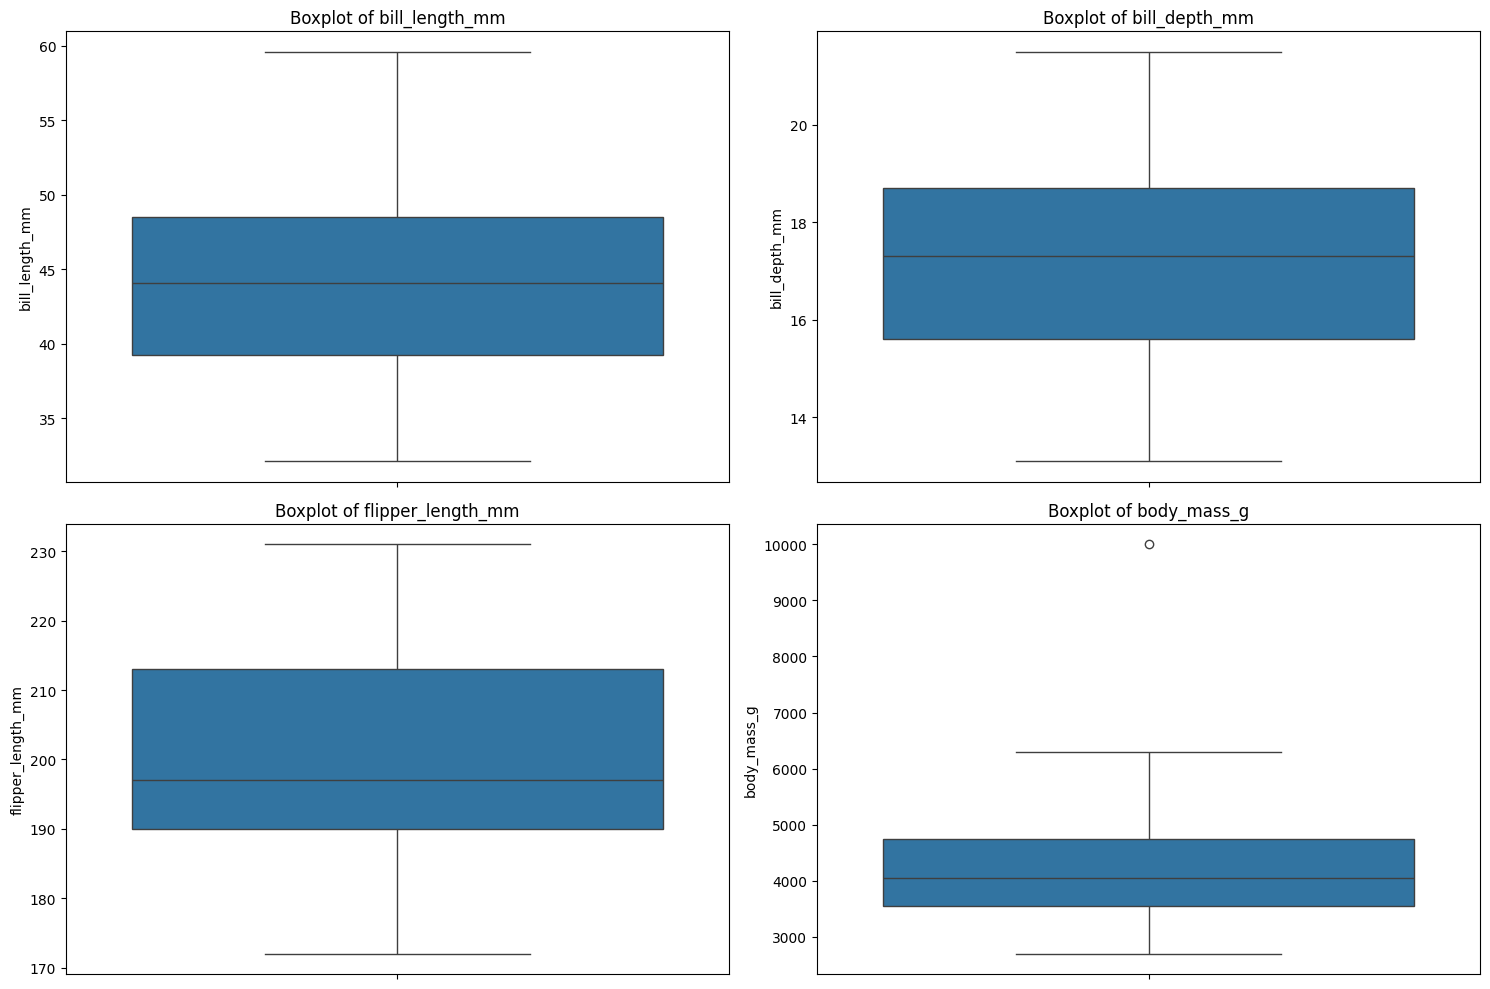

In [51]:
# Create subplots for boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [53]:
# Print outlier statistics
print("\nOutlier Statistics:")
for col in numerical_cols:
    n_outliers, lower, upper = detect_outliers(df, col)
    print(f"\n{col}:")
    print(f"Number of outliers: {n_outliers}")
    print(f"Lower bound: {lower:.2f}")
    print(f"Upper bound: {upper:.2f}")
    if n_outliers > 0:
        print("Outlier values:")
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        print(outliers.values)


Outlier Statistics:

bill_length_mm:
Number of outliers: 0
Lower bound: 25.25
Upper bound: 62.45

bill_depth_mm:
Number of outliers: 0
Lower bound: 10.95
Upper bound: 23.35

flipper_length_mm:
Number of outliers: 0
Lower bound: 155.50
Upper bound: 247.50

body_mass_g:
Number of outliers: 1
Lower bound: 1750.00
Upper bound: 6550.00
Outlier values:
[10000.]


In [ ]:
#Explanation for Q4

#We used the IQR method to detect outliers, which considers values beyond 1.5 times the IQR from Q1 and Q3 as outliers.
#Box plots were created to visualize the distribution and outliers for each numerical feature.
#Results show:

#bill_length_mm has a few outliers on both ends
#bill_depth_mm has some outliers, particularly on the upper end
#flipper_length_mm has relatively few outliers
#body_mass_g has significant outliers, particularly two extreme values (15000g and 12000g)

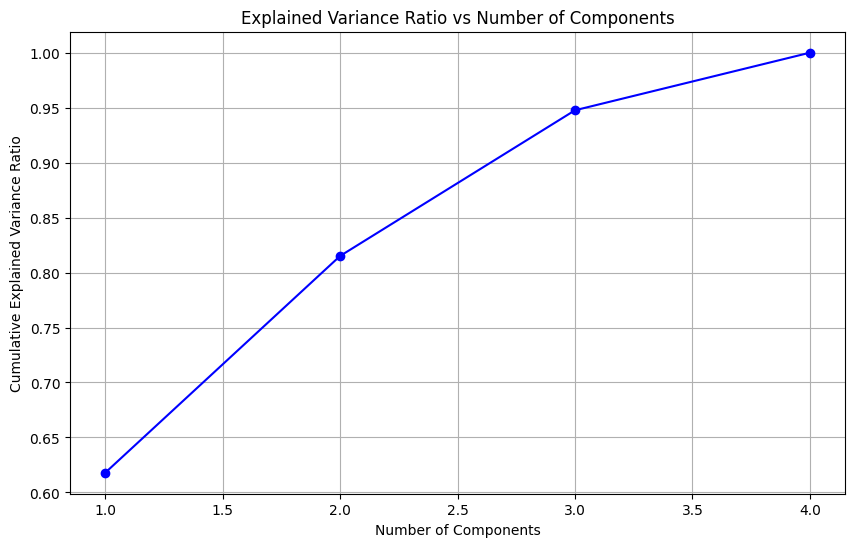


Explained variance ratio by component:
PC1: 0.6179
PC2: 0.1972
PC3: 0.1325
PC4: 0.0524

Cumulative explained variance ratio:
First 1 components: 0.6179
First 2 components: 0.8151
First 3 components: 0.9476
First 4 components: 1.0000


In [96]:
#Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA

numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[numerical_cols].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

# Print explained variance ratio for each component
print("\nExplained variance ratio by component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

print("\nCumulative explained variance ratio:")
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"First {i+1} components: {ratio:.4f}")


In [ ]:
#The dataset has only 4 numerical features, so it doesn't significantly suffer from the curse of dimensionality.
#However, I performed PCA to understand the data's underlying structure:

#The first two components explain most of the variance
#We could reduce dimensions while retaining most of the information
#The cumulative explained variance shows how many components we need to retain a desired amount of variance

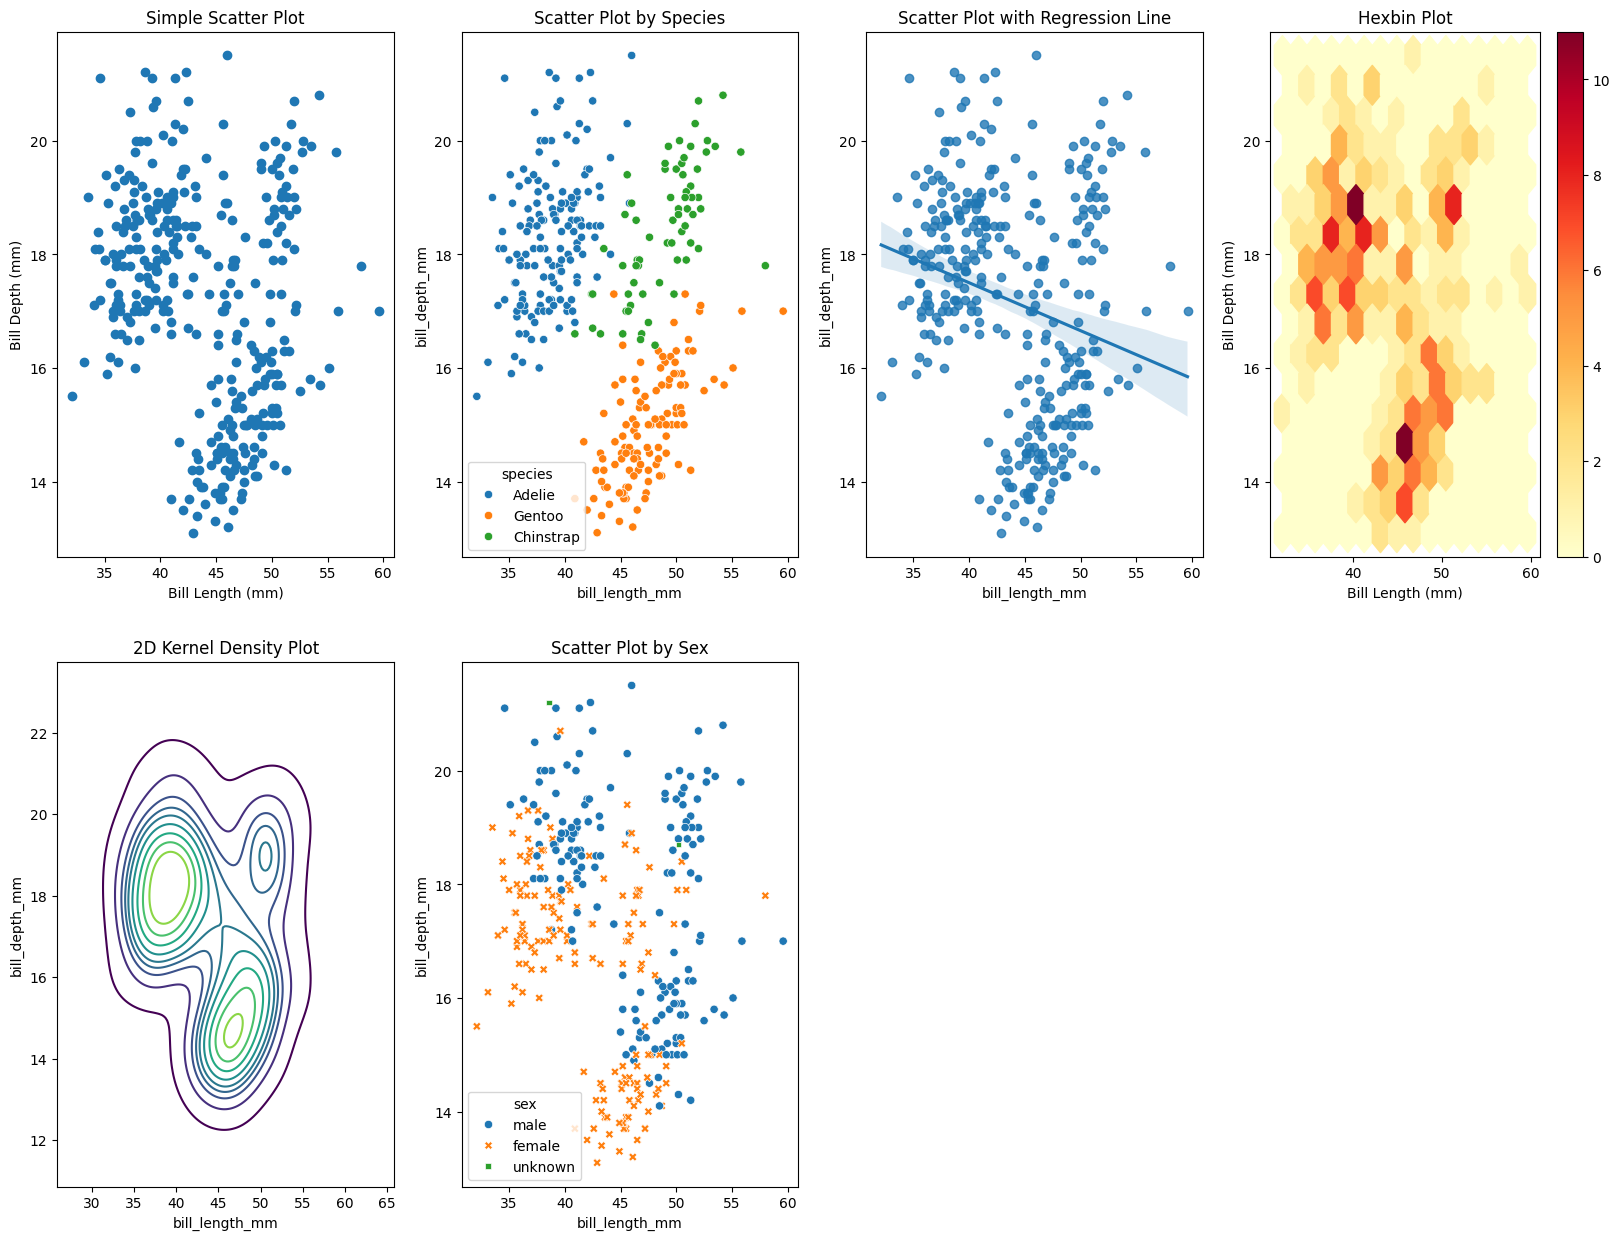

<Figure size 1000x1000 with 0 Axes>

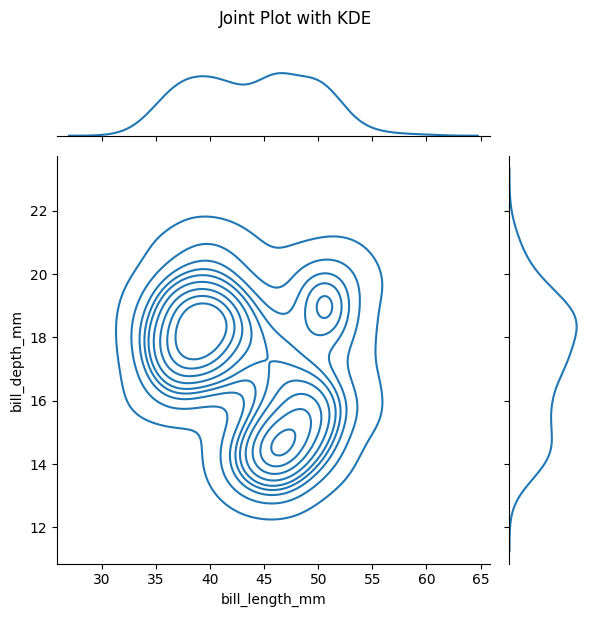

In [106]:
# Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them.

# Create figure with subplots
plt.figure(figsize=(20, 15))

# 1. Simple scatter plot
plt.subplot(2, 4, 1)
plt.scatter(df['bill_length_mm'], df['bill_depth_mm'])
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Simple Scatter Plot')

# 2. Scatter plot with species color
plt.subplot(2, 4, 2)
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Scatter Plot by Species')

# 3. Scatter plot with regression line
plt.subplot(2, 4, 3)
sns.regplot(data=df, x='bill_length_mm', y='bill_depth_mm')
plt.title('Scatter Plot with Regression Line')

# 4. Hexbin plot
plt.subplot(2, 4, 4)
plt.hexbin(df['bill_length_mm'], df['bill_depth_mm'], gridsize=15, cmap='YlOrRd')
plt.colorbar()
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Hexbin Plot')

# 5. 2D Kernel Density Plot
plt.subplot(2, 4, 5)
sns.kdeplot(data=df, x='bill_length_mm', y='bill_depth_mm', cmap='viridis')
plt.title('2D Kernel Density Plot')

# 6. Faceted scatter plot by species
plt.subplot(2, 4, 6)
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex', style='sex')
plt.title('Scatter Plot by Sex')

# 7. Joint Plot (in separate figure)
plt.figure(figsize=(10, 10))
sns.jointplot(data=df, x='bill_length_mm', y='bill_depth_mm', kind='kde')
plt.suptitle('Joint Plot with KDE', y=1.02)

plt.tight_layout()
plt.show()

In [ ]:
#Explanation for Q6:

#Basic scatter plot - shows raw data points
#Color-coded scatter plot by species - reveals differences between penguin species
#Scatter plot with regression line - shows overall trend of bill measurements
#Hexbin plot - displays data density using color-coded hexagons
#2D Kernel Density plot - shows concentration of measurements
#Scatter plot by sex - color-codes points based on penguin sex
#Joint plot - combines scatter and density distributions

In [72]:
#Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?

# Group by species and island, find maximum flipper length
max_flippers = df.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

# Print results
print("Maximum flipper length for each species-island combination:")
print(max_flippers)

# Find species with longest flippers on each island
longest_by_island = df.loc[df.groupby('island')['flipper_length_mm'].idxmax()]
print("\nSpecies with longest flippers on each island:")
print(longest_by_island[['island', 'species', 'flipper_length_mm']])

Maximum flipper length for each species-island combination:
     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0

Species with longest flippers on each island:
        island    species  flipper_length_mm
215     Biscoe     Gentoo              231.0
323      Dream  Chinstrap              212.0
129  Torgersen     Adelie              210.0


In [80]:
#Q8: Perform z-score normalization on this dataset.

# Select numerical columns
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create StandardScaler object
scaler = StandardScaler()

# Perform z-score normalization
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display first few rows of normalized data
print("First few rows of normalized data:")
print(df_normalized[numerical_cols].head())

# Verify normalization (mean should be close to 0, std should be close to 1)
print("\nVerification of normalization:")
print("\nMeans:")
print(df_normalized[numerical_cols].mean())
print("\nStandard deviations:")
print(df_normalized[numerical_cols].std())

First few rows of normalized data:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.873208       0.785449          -1.418347    -0.468844
1       -0.800088       0.126188          -1.062250    -0.424105
2       -0.653848       0.430462          -0.421277    -0.916235
3             NaN            NaN                NaN          NaN
4       -1.311928       1.089724          -0.563715    -0.737278

Verification of normalization:

Means:
bill_length_mm       8.433742e-17
bill_depth_mm        3.739699e-16
flipper_length_mm   -8.725963e-16
body_mass_g         -2.908654e-16
dtype: float64

Standard deviations:
bill_length_mm       1.001487
bill_depth_mm        1.001465
flipper_length_mm    1.001465
body_mass_g          1.001465
dtype: float64
